In [20]:
%matplotlib inline

import json
import os
import pickle

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.utils.data
import torchvision
from torchvision import transforms
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

In [22]:
model = None
with open("temp.model", "rb") as f:
    model = pickle.load(f)

In [23]:
from Datasets import MoNuSeg

In [24]:
img_name = MoNuSeg.FileReader.files[1]
print(img_name)
img = MoNuSeg.FileReader.get_image(img_name)
colormask = MoNuSeg.FileReader.get_colormask(img_name)
polymask = MoNuSeg.FileReader.get_polymask(img_name)

TCGA-21-5784-01Z-00-DX1


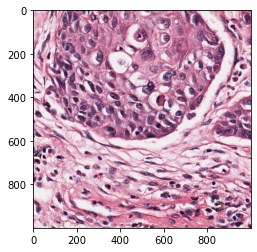

In [26]:
plt.imshow(MoNuSeg.util.correct_axes(img))

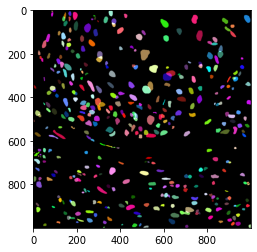

In [27]:
plt.imshow(MoNuSeg.util.correct_axes(colormask))

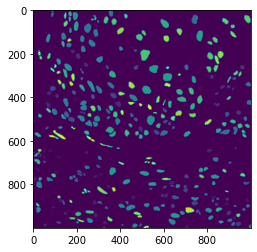

In [18]:
plt.imshow(polymask)

In [28]:
cell_crop_dir = "/workspaces/dev-container/testing/data/CellCrops/eosinophil/"
def load_cell_crop(filepath):
    if cell_crop_dir not in filepath:
        filepath = os.path.join(cell_crop_dir, filepath)
    img = Image.open(filepath)
    img = transforms.ToTensor()(img)
    return img

In [48]:
def get_predictions(img):
    class Predictions:
        def __init__(self, predictions):
            self.data = predictions
        def __getitem__(self, index):
            return self.data[index, 0].mul(255).byte().numpy()
    prediction = None
    with torch.no_grad():
        prediction = model([img])
    return Predictions(prediction[0]['masks'])

In [ ]:
cell_crops = os.listdir(cell_crop_dir)
img = load_cell_crop(cell_crops[1])

In [49]:
predictions = get_prediction(img)

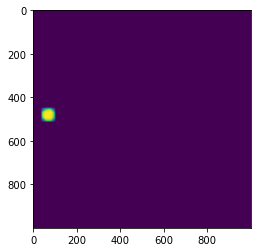

In [51]:
plt.imshow(predictions[0])